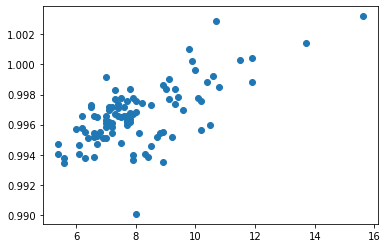

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfx=pd.read_csv(r'C:\Users\Zenbook\Downloads\linearX.csv')
dfy=pd.read_csv(r'C:\Users\Zenbook\Downloads\linearY.csv')

x=np.array(dfx.values)
x=x.reshape((-1,))
y=np.array(dfy.values)
y=y.reshape((-1,))

plt.scatter(x,y)
plt.show()

x=((x-x.mean())/x.std())

In [101]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x







In [102]:
def error(x,y,theta):
    er=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        er += (hx-y[i])**2
    return er

In [103]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i]
        
    return grad    
        

In [104]:
def gradientdescent(x,y,learningrate=0.001):
    theta=np.array([2.0,0.0])
    
    error_list=[]
    theta_list=[]
    max_iterations=100
    itr=0
    while(itr<=max_iterations):
        grad=gradient(x,y,theta)
        theta_list.append((theta[0],theta[1]))
        theta[0]-=learningrate*grad[0]
        theta[1]-=learningrate*grad[1]
        
        er=error(x,y,theta)
        error_list.append(er)
        itr+=1
    return theta,error_list,theta_list


In [105]:

final_theta, error_list,theta_list = gradientdescent(x,y)

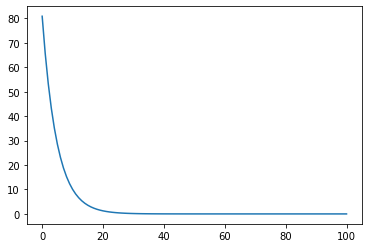

In [106]:
plt.plot(error_list)

In [107]:
print(final_theta)

[0.99666097 0.0013579 ]


In [112]:
xtest=np.linspace(-2,8,100)
print(xtest)

[-2.         -1.8989899  -1.7979798  -1.6969697  -1.5959596  -1.49494949
 -1.39393939 -1.29292929 -1.19191919 -1.09090909 -0.98989899 -0.88888889
 -0.78787879 -0.68686869 -0.58585859 -0.48484848 -0.38383838 -0.28282828
 -0.18181818 -0.08080808  0.02020202  0.12121212  0.22222222  0.32323232
  0.42424242  0.52525253  0.62626263  0.72727273  0.82828283  0.92929293
  1.03030303  1.13131313  1.23232323  1.33333333  1.43434343  1.53535354
  1.63636364  1.73737374  1.83838384  1.93939394  2.04040404  2.14141414
  2.24242424  2.34343434  2.44444444  2.54545455  2.64646465  2.74747475
  2.84848485  2.94949495  3.05050505  3.15151515  3.25252525  3.35353535
  3.45454545  3.55555556  3.65656566  3.75757576  3.85858586  3.95959596
  4.06060606  4.16161616  4.26262626  4.36363636  4.46464646  4.56565657
  4.66666667  4.76767677  4.86868687  4.96969697  5.07070707  5.17171717
  5.27272727  5.37373737  5.47474747  5.57575758  5.67676768  5.77777778
  5.87878788  5.97979798  6.08080808  6.18181818  6

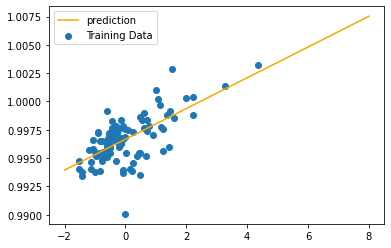

In [113]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='prediction')
plt.legend()
plt.show()